## Prostorne transformacije

In [1]:
from pylab import *
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage
from skimage import color
from skimage import exposure
from skimage import filters
from skimage import img_as_float, img_as_ubyte

import scipy
from scipy import ndimage

import numpy as np
#plt.style.use('dark_background')

### Blurovanje slike

Box maska

In [2]:
img = img_as_float(imread('test_pattern.tif'))

filter_mask = np.ones((31,31), dtype='uint8')

img_blurred_err = ndimage.correlate(img, filter_mask, mode='constant')

filter_mask = filter_mask/sum(filter_mask)

img_blurred_replicatepadding = ndimage.correlate(img, filter_mask, mode='nearest')
img_blurred_zeropadding = ndimage.correlate(img, filter_mask, mode='constant')

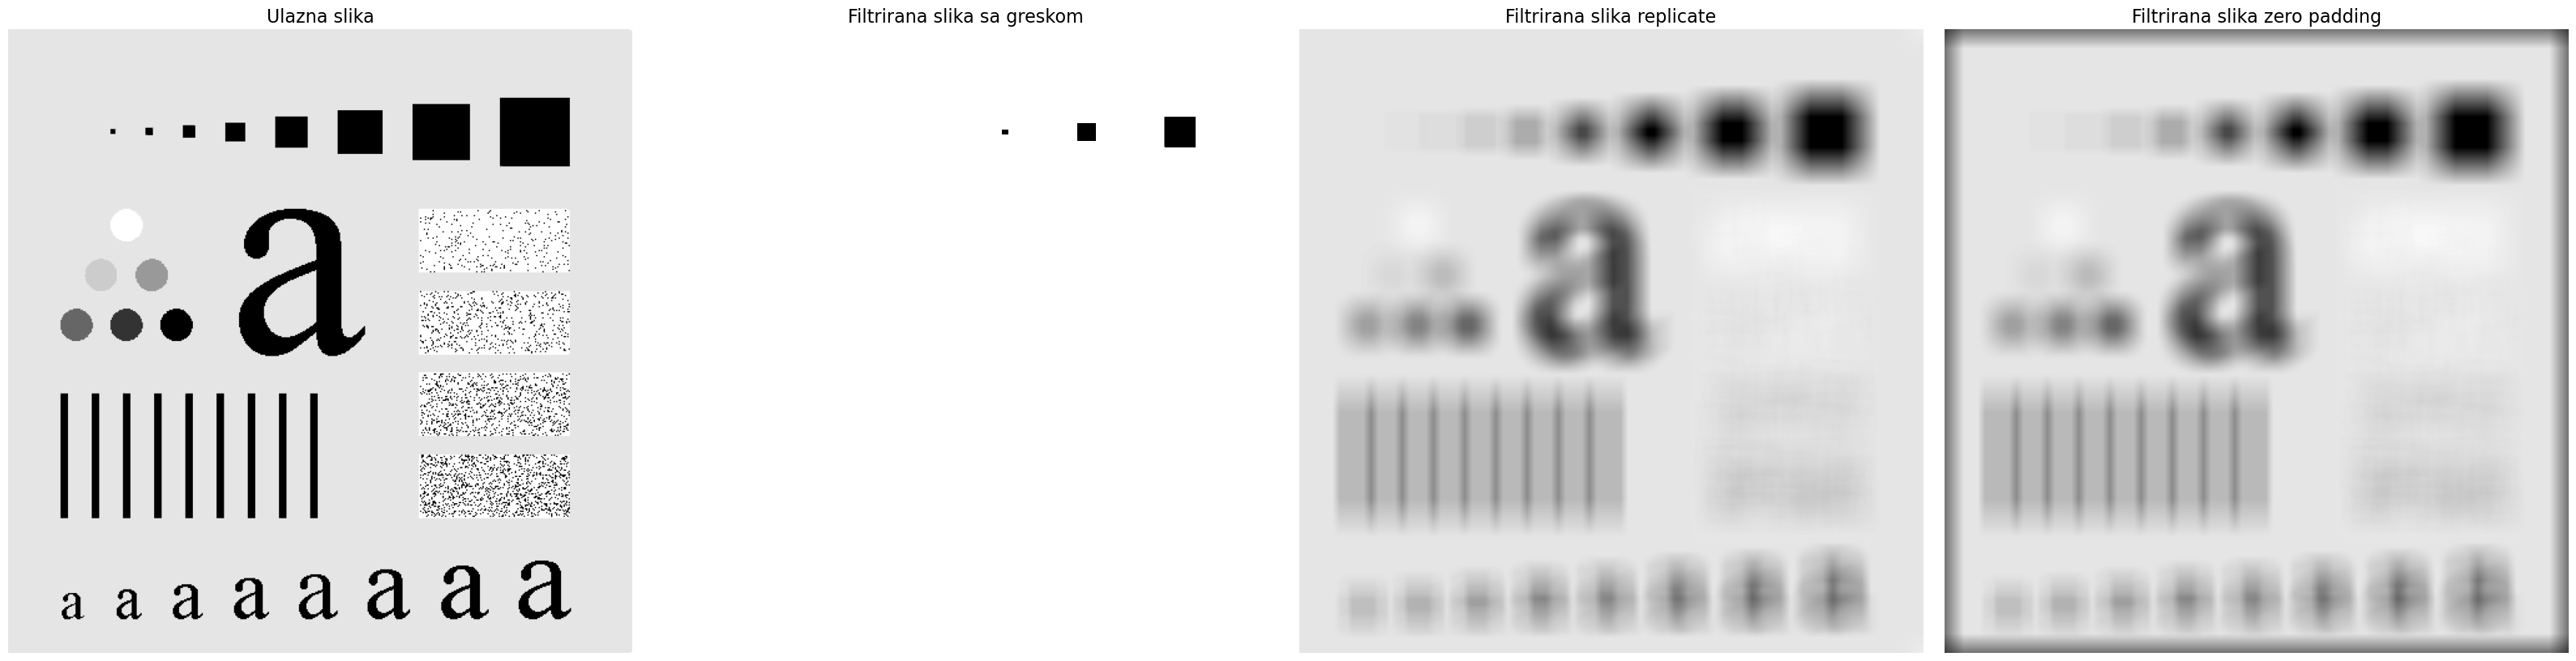

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(32,8), dpi=100)
ax = axes.ravel()

ax[0].imshow(img, vmin=0, vmax=1, cmap='gray')
ax[0].set_axis_off()
ax[0].set_title('Ulazna slika', fontsize=16)
ax[1].imshow(img_blurred_err, vmin=0, vmax=1, cmap='gray')
ax[1].set_axis_off()
ax[1].set_title('Filtrirana slika sa greskom', fontsize=16)
ax[2].imshow(img_blurred_replicatepadding, vmin=0, vmax=1, cmap='gray')
ax[2].set_axis_off()
ax[2].set_title('Filtrirana slika replicate', fontsize=16)
ax[3].imshow(img_blurred_zeropadding, vmin=0, vmax=1, cmap='gray')
ax[3].set_axis_off()
ax[3].set_title('Filtrirana slika zero padding', fontsize=16)

plt.show()

## Gaussian blur

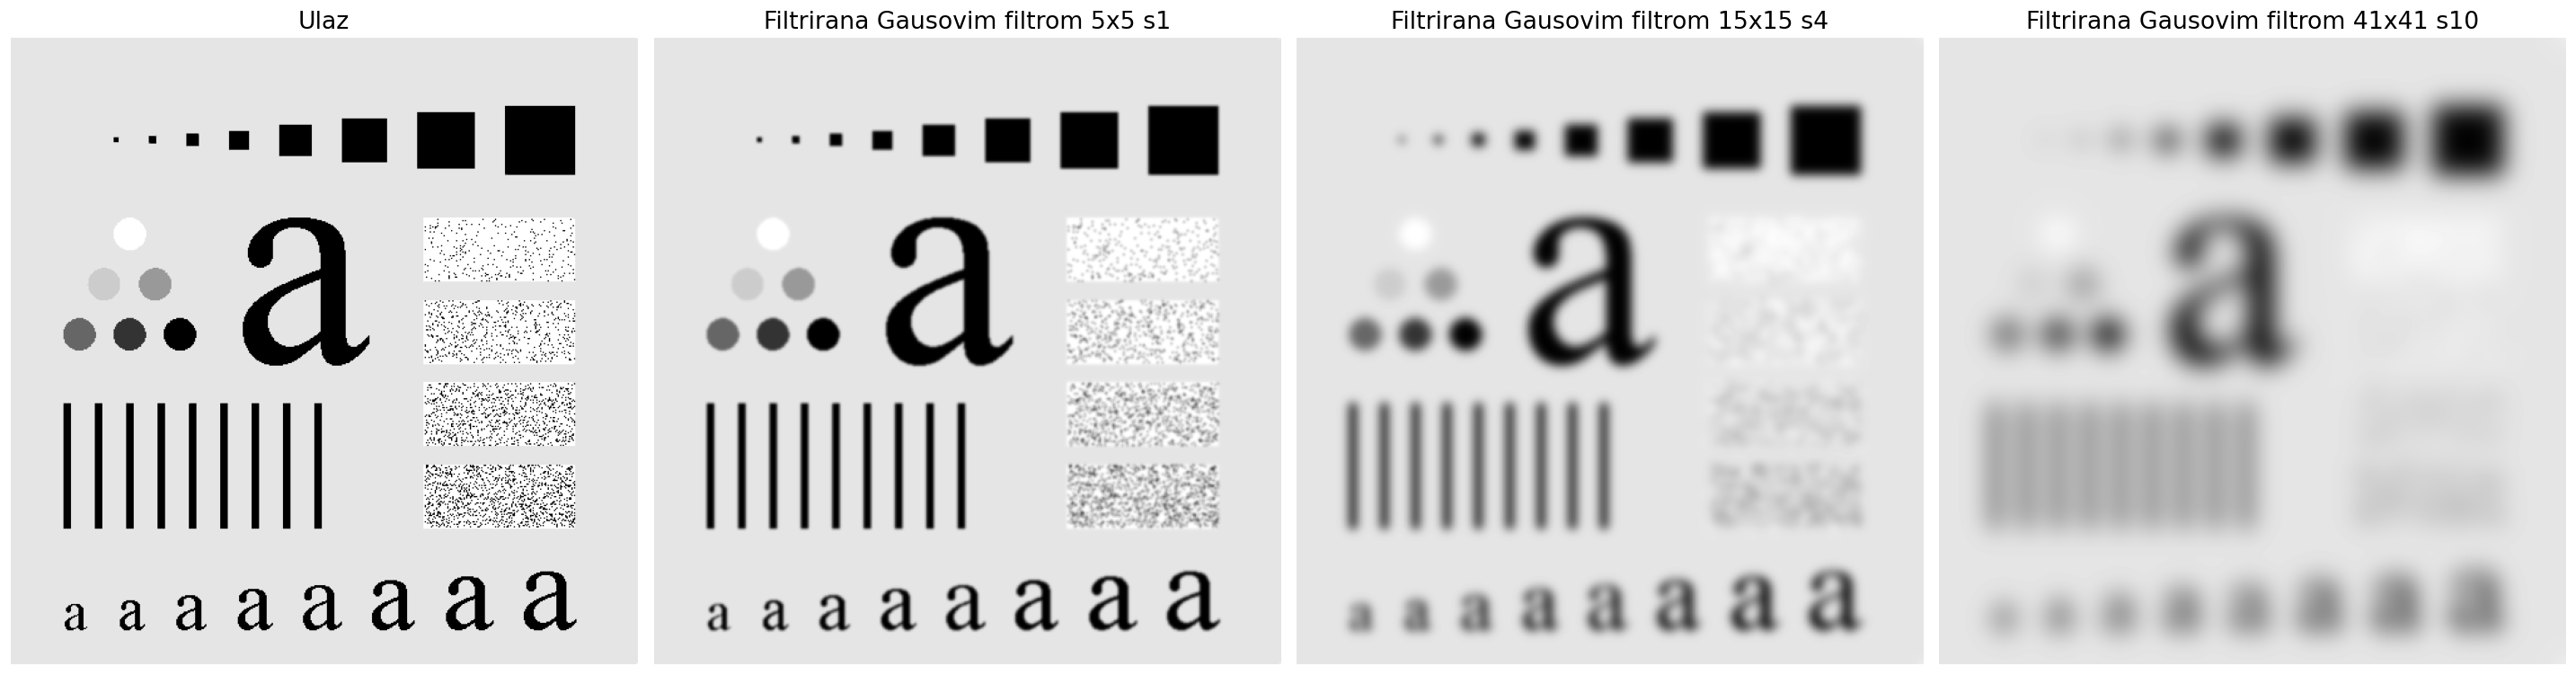

In [5]:
# NOTE Napisati fju za filtriranje gausovim filtrom razlicitih dimenzija i standardne devijacije
# truncate je broj sigmi koje zelimo u prozoru velicina filtra je sigma*truncate
img_gauss_5 = filters.gaussian(img, sigma=1, truncate=5)
# velicina filtra 15, sigma 4, znaci truncate = 15/4=3.75
img_gauss_15 = filters.gaussian(img, sigma=4, truncate=3.75)
img_gauss_41 = filters.gaussian(img, sigma=10, truncate=4.1)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24,8), dpi=120)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray', vmin=0, vmax=1)
ax[0].set_axis_off()
ax[0].set_title('Ulaz', fontsize=16)

ax[1].imshow(img_gauss_5, cmap='gray', vmin=0, vmax=1)
ax[1].set_axis_off()
ax[1].set_title('Filtrirana Gausovim filtrom 5x5 s1', fontsize=16)

ax[2].imshow(img_gauss_15, cmap='gray', vmin=0, vmax=1)
ax[2].set_axis_off()
ax[2].set_title('Filtrirana Gausovim filtrom 15x15 s4', fontsize=16)

ax[3].imshow(img_gauss_41, cmap='gray', vmin=0, vmax=1)
ax[3].set_axis_off()
ax[3].set_title('Filtrirana Gausovim filtrom 41x41 s10', fontsize=16)

plt.tight_layout()
plt.show()

# Izostravanje

## Laplasijan

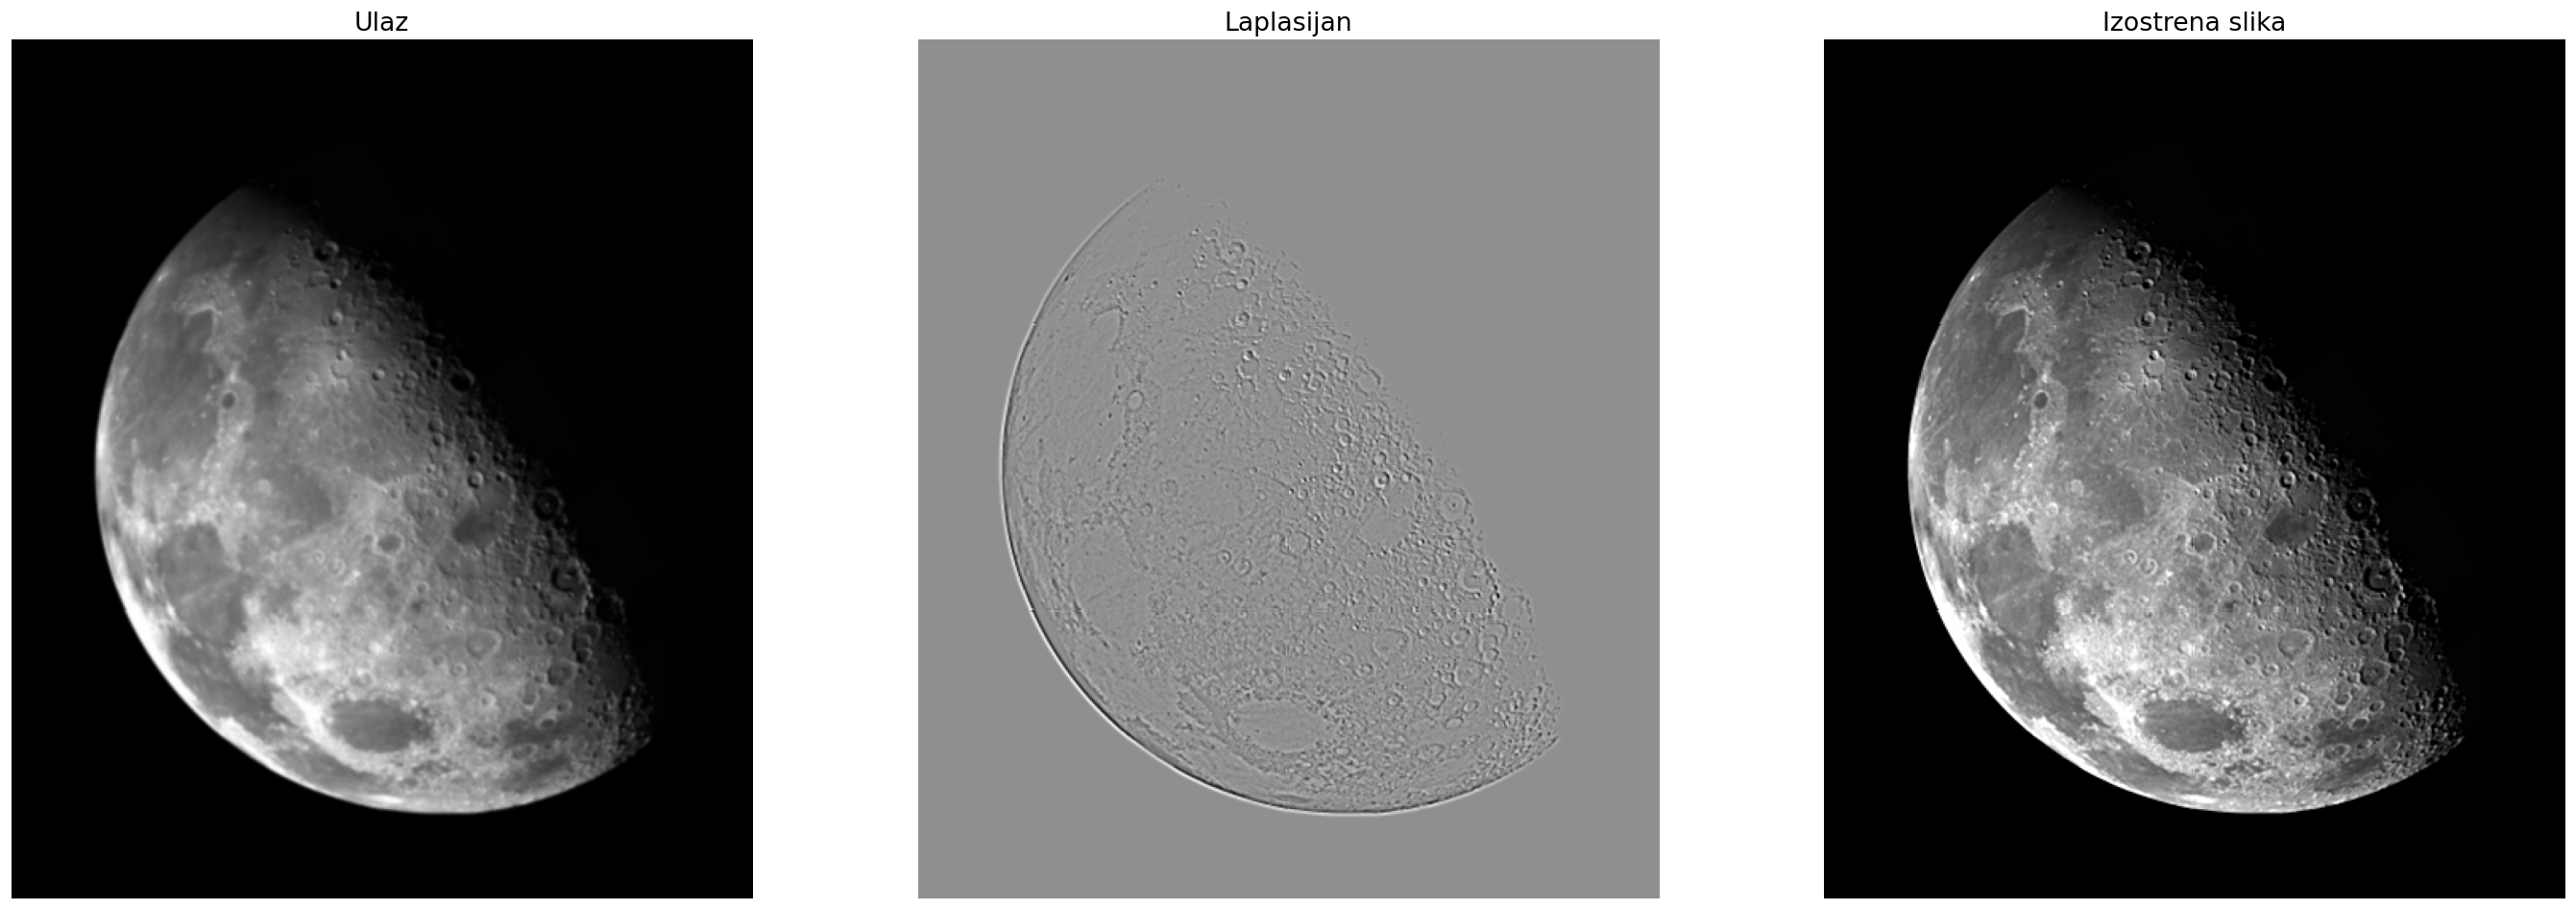

In [26]:
img = img_as_float(imread('blurry_moon.tif'))

laplacian_mask = np.array([[ 0, 1, 0],
                           [ 1,-4, 1],
                           [ 0, 1, 0]])
img_lap = ndimage.correlate(img, laplacian_mask)
img_sharp = img - img_lap

img_sharp[img_sharp>1] = 1
img_sharp[img_sharp<0] = 0

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8), dpi=120)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray', vmin=0, vmax=1)
ax[0].set_axis_off()
ax[0].set_title('Ulaz', fontsize=16)

ax[1].imshow(img_lap, cmap='gray')
ax[1].set_axis_off()
ax[1].set_title('Laplasijan', fontsize=16)

ax[2].imshow(img_sharp, cmap='gray', vmin=0, vmax=1)
ax[2].set_axis_off()
ax[2].set_title('Izostrena slika', fontsize=16)


plt.tight_layout()
plt.show()

### Unsharp mask

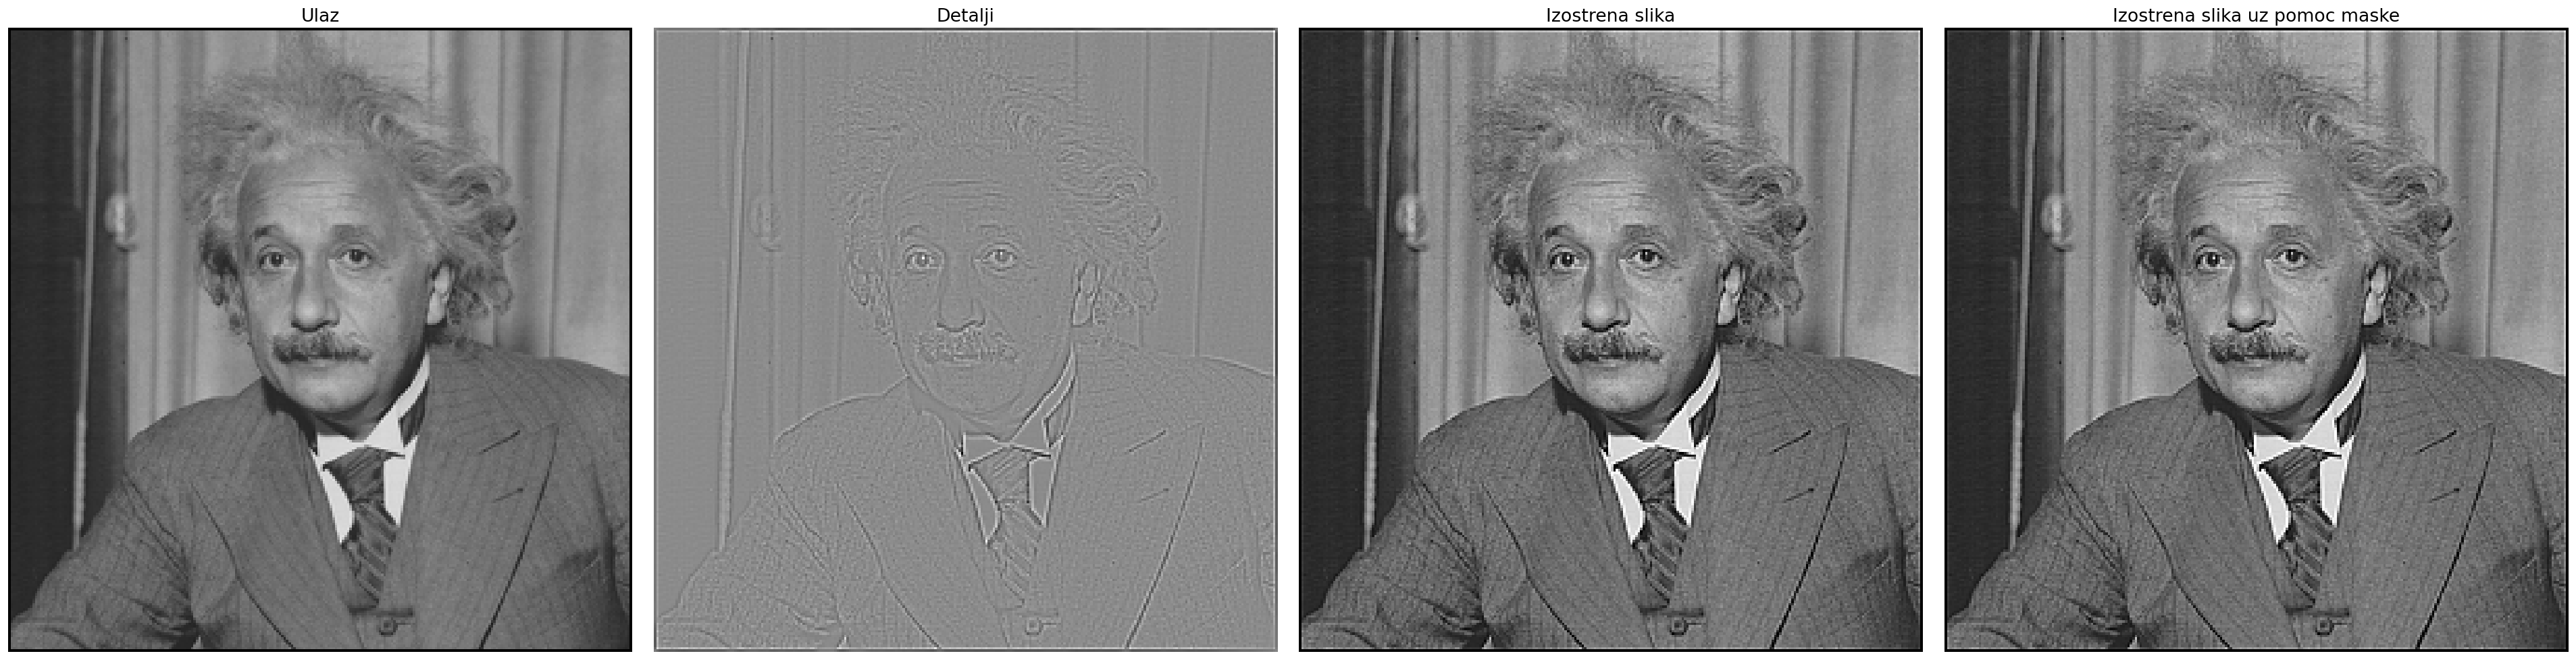

In [36]:
# TODO realizovati unsharp mask prema uputstvu sa prezentacije
# potrebno je usrednjiti sliku, naci razliku originalne i usrednjene i to dodati na originalnu sliku.
# ograniciti opseg vrednosti konacne slike i prikazati sve elemente kao sto je obelezeno

img = img_as_float(imread('einstein.tif'))

lowpass_mask = np.ones(shape=(3,3))/9
img_blurred = ndimage.correlate(img, lowpass_mask)
img_details = img - img_blurred

img_sharp = img + img_details

img_sharp[img_sharp<0]=0
img_sharp[img_sharp>1]=1

sharp_mask = 1/9*np.array([[-1,-1,-1],
                       [-1,17,-1],
                       [-1,-1,-1]])
                      

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,8), dpi=120)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray', vmin=0, vmax=1)
ax[0].set_axis_off()
ax[0].set_title('Ulaz', fontsize=16)

ax[1].imshow(img_details, cmap='gray')
ax[1].set_axis_off()
ax[1].set_title('Detalji', fontsize=16)

ax[2].imshow(img_sharp, cmap='gray')
ax[2].set_axis_off()
ax[2].set_title('Izostrena slika', fontsize=16)
                      
plt.tight_layout()
plt.show()

## Nelinearna filtriranja

### Median filtar

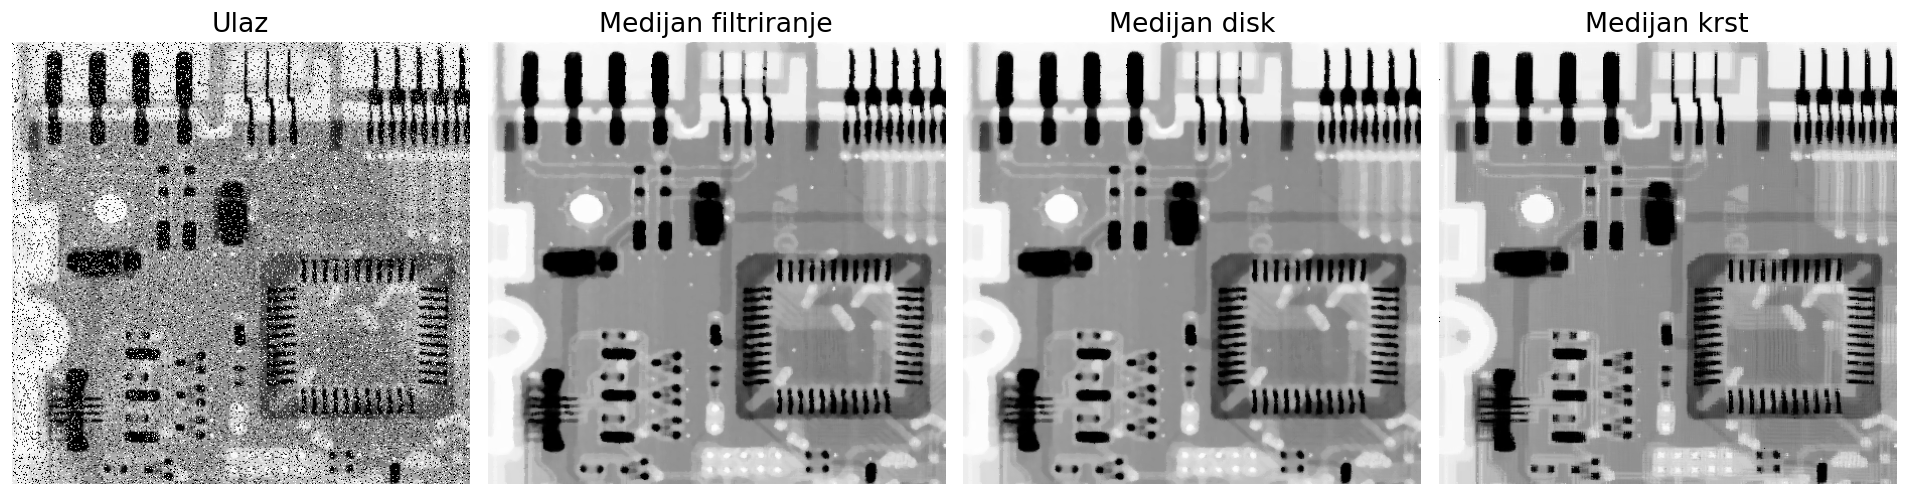

In [48]:
# NOTE uraditi filtriranje medijanom sa maskama disk i cross

img = img_as_float(imread('ckt_board.tif'))

img_med = filters.median(img, np.ones(shape=(5,5)), mode='nearest')

from skimage import morphology
img_med_disk = filters.median(img, morphology.disk(3), mode='nearest')

cross_dim = 9
cross = np.zeros(shape=(cross_dim,cross_dim))
cross[:,uint((cross_dim-1)/2)] = 1
cross[uint((cross_dim-1)/2),:] = 1
img_med_cross = filters.median(img, cross, mode='nearest')

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,8), dpi=120)
ax = axes.ravel()

ax[0].imshow(img, cmap='gray', vmin=0, vmax=1)
ax[0].set_axis_off()
ax[0].set_title('Ulaz', fontsize=16)

ax[1].imshow(img_med, cmap='gray')
ax[1].set_axis_off()
ax[1].set_title('Medijan filtriranje', fontsize=16)

ax[2].imshow(img_med_disk, cmap='gray')
ax[2].set_axis_off()
ax[2].set_title('Medijan disk', fontsize=16)

ax[3].imshow(img_med_cross, cmap='gray', vmin=0, vmax=1)
ax[3].set_axis_off()
ax[3].set_title('Medijan krst', fontsize=16)

plt.tight_layout()
plt.show()